<a href="https://colab.research.google.com/github/mrityunjay-singh-99/Deeplearing/blob/master/churndata_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
churn_df=pd.read_csv("/content/telecom_churn_data.csv")
churn_df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [ ]:
churn_df.isnull().sum()

,0
year,0
customer_id,0
phone_no,0
gender,24
age,0
no_of_days_subscribed,0
multi_screen,0
mail_subscribed,0
weekly_mins_watched,0
minimum_daily_mins,0


In [ ]:
churn_df["gender"]=churn_df["gender"].fillna(churn_df["gender"].mode()[0])
churn_df["maximum_days_inactive"]=churn_df["maximum_days_inactive"].fillna(churn_df["maximum_days_inactive"].mode()[0])
churn_df["churn"]=churn_df["churn"].fillna(churn_df["churn"].mode()[0])

In [ ]:
cat_col=churn_df.select_dtypes(include="object").columns
cat_col

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_col:
  churn_df[i]=le.fit_transform(churn_df[i])
churn_df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,1754,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,299,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,957,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,75,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,517,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0


In [ ]:
X=churn_df.drop("churn",axis=1)
y=churn_df["churn"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1324)

In [ ]:
model=Sequential()

#input layer
model.add(Dense(15,input_dim=X_train.shape[1],activation="relu"))

#hidden layers
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))

#output layer
model.add(Dense(1,activation="sigmoid"))

#model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,609 (41.44 KB)

 Trainable params: 10,609 (41.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compiling ANN
model.compile(optimizer="adam",
            loss="binary_crossentropy",
            metrics=["accuracy","precision","recall","f1_score"])

history=model.fit(X_train,
                  y_train,
                  epochs=10,
                  #batch_size=150,
                  validation_data=(X_test,y_test),
                  verbose=True)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7609 - f1_score: 0.1351 - loss: 354.3181 - precision: 0.1182 - recall: 0.1488 - val_accuracy: 0.8850 - val_f1_score: 0.0000e+00 - val_loss: 255.1026 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7882 - f1_score: 0.0930 - loss: 223.2752 - precision: 0.0900 - recall: 0.0855 - val_accuracy: 0.8850 - val_f1_score: 0.0000e+00 - val_loss: 218.8383 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7893 - f1_score: 0.1185 - loss: 108.8627 - precision: 0.1029 - recall: 0.1025 - val_accuracy: 0.8850 - val_f1_score: 0.0000e+00 - val_loss: 40.7006 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7557 - f1_score: 0.2036 - loss: 121.1483 - precision: 0.1463 - recall: 0.1913 - val_accuracy: 0.8850 - val_f1_score: 0.0000e+00 - val_loss

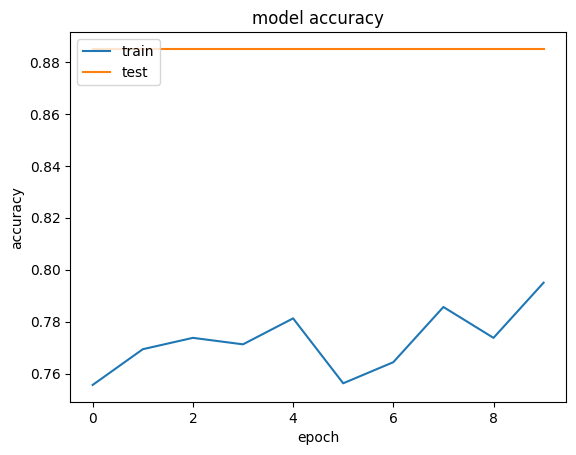

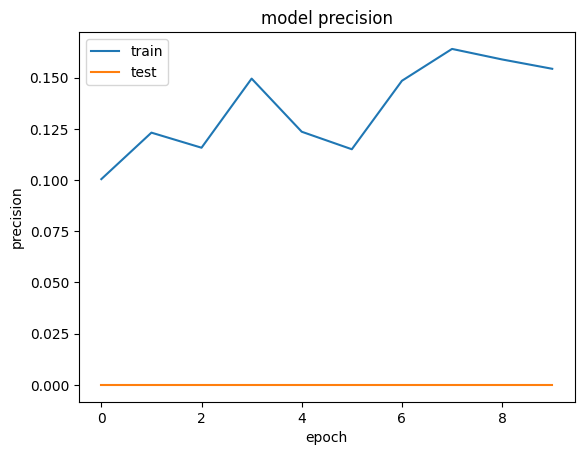

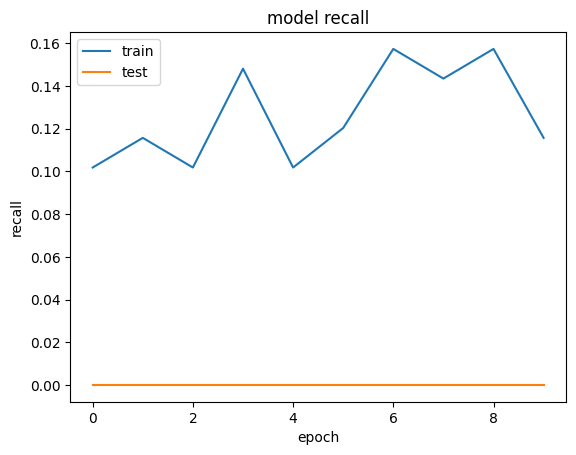

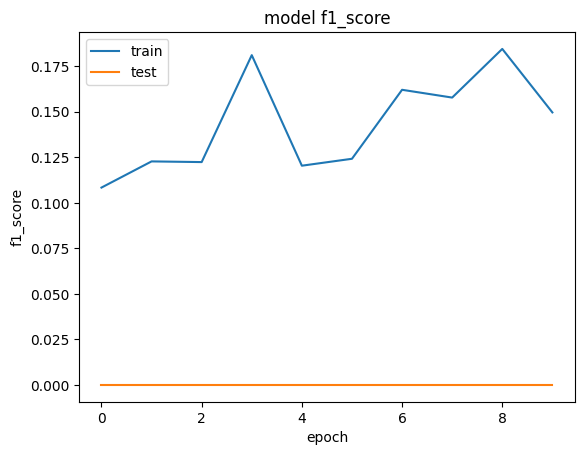

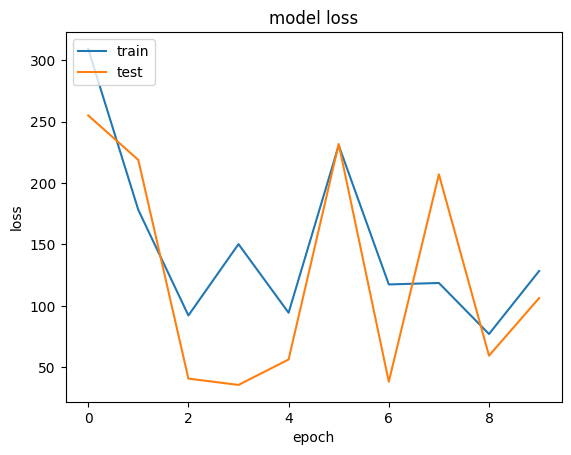

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8942 - f1_score: 0.0000e+00 - loss: 92.1507 - precision: 0.0000e+00 - recall: 0.0000e+00 


[106.31595611572266, 0.8849999904632568, 0.0, 0.0, 0.0]

In [ ]:
model.evaluate(X_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8942 - f1_score: 0.0000e+00 - loss: 92.1507 - precision: 0.0000e+00 - recall: 0.0000e+00 


[106.31595611572266, 0.8849999904632568, 0.0, 0.0, 0.0]

In [ ]:
# test_loss,test_accuracy=model.evaluate(X_test,y_test)
# print("Test Loss: ",test_loss)
# print("Test Accuracy: ",test_accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8942 - f1_score: 0.0000e+00 - loss: 92.1507 - precision: 0.0000e+00 - recall: 0.0000e+00 


ValueError: too many values to unpack (expected 2)

In [ ]:
y_predict=model.predict(X_test)
#y_predict

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
ground_truth_data=y_test.values
print(ground_truth_data)
predict_data=y_predict.astype(int)
#print(predict_data)

[0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.

In [ ]:
df=pd.DataFrame()
df["ground_truth"]=ground_truth_data
df["predict_data"]=predict_data
df

,ground_truth,predict_data
0,0.0,0
1,0.0,0
2,1.0,0
3,0.0,0
4,1.0,0
...,...,...
395,0.0,0
396,0.0,0
397,0.0,0
398,1.0,0
